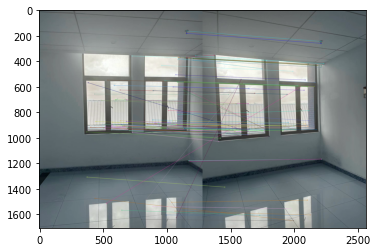

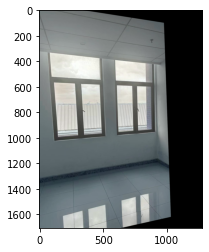

True

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# 读入待变换图片和参考图片
img1 = cv2.imread('img1.jpg')
img2 = cv2.imread('img2.jpg')

# 创建SIFT特征提取器
sift = cv2.SIFT_create()

# 检测关键点并计算描述符
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# 创建FLANN匹配器
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

# 特征点匹配
matches = flann.knnMatch(des1, des2, k=2)

# 过滤匹配点，取优秀匹配
good = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good.append(m)

# 绘制匹配结果
img_match = cv2.drawMatches(img1, kp1, img2, kp2, good, None, flags=2)

# 显示匹配结果
plt.imshow( img_match),plt.show()

# 获取匹配点坐标
src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

# 计算单应性矩阵
H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# 对待变换图片进行单应性变换
img_transformed = cv2.warpPerspective(img1, H, (img2.shape[1], img2.shape[0]))

# 显示变换后的图片
plt.imshow( img_transformed),plt.show()

# 保存变换后的图片
cv2.imwrite('transformed.jpg', img_transformed)
